In [1]:
from core.models import LogisticRegression

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
optimizer = RMSPropOptimizer(learning_rate=0.03)
regularizer = Regu

model = LogisticRegression(optimizer=optimizer, num_iterations=200, fit_intercept=False)
model.fit(X_train, y_train)

In [8]:
model.theta

array([ 1.06478095, -1.77822621])

In [9]:
model.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

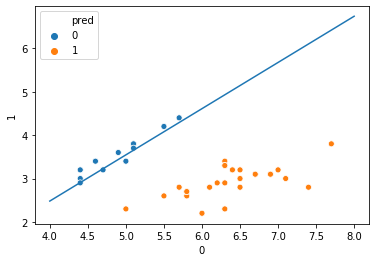

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.DataFrame(X_test)
df['y'] = y_test
df['pred'] = model.predict(X_test)

a, b = model.theta[0], model.theta[1]
foo = lambda x: a * x + b

sns.scatterplot(data=df, x=0, y=1, hue='pred')
plt.plot([4, 8], [foo(4), foo(8)])
plt.show()

In [11]:
model.evaluate(y_test, model.predict(X_test))

1.0

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from core.models import SVM

def remove_correlated_features(X):
    corr_threshold = 0.9
    corr = X.corr()
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped


def remove_less_significant_features(X, Y):
    sl = 0.05
    regression_ols = None
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()
        max_val = regression_ols.pvalues.max()
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped


print("reading dataset...")
# read data in pandas (pd) data frame
data = pd.read_csv('./datasets/breast_cancer.csv')

# drop last column (extra column added by pd)
# and unnecessary first column (id)
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

print("applying feature engineering...")
# convert categorical labels to numbers
diag_map = {'M': 1.0, 'B': -1.0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

# put features & outputs in different data frames
Y = data.loc[:, 'diagnosis']
X = data.iloc[:, 1:]

# filter features
remove_correlated_features(X)
remove_less_significant_features(X, Y)

# normalize data for better convergence and to prevent overflow
X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

# split data into train and test set
print("splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = tts(
    X, Y, test_size=0.2, random_state=42)

# train the model
print("training started...")
classifier = SVM()
classifier.fit(X_train.to_numpy(), y_train.to_numpy())
print("training finished.")
print("weights are: {}".format(classifier.weights))

# testing the model
print("testing the model...")
y_train_predicted = classifier.predict(X_train)
y_test_predicted = classifier.predict(X_test)

print("accuracy on test dataset: {}".format(
    accuracy_score(y_test, y_test_predicted)))
print("recall on test dataset: {}".format(
    recall_score(y_test, y_test_predicted)))
print("precision on test dataset: {}".format(
    recall_score(y_test, y_test_predicted)))




reading dataset...
applying feature engineering...
splitting dataset into train and test sets...
training started...


NameError: name 'shuffle' is not defined